# Python aplicado a Big Data
## Dia 8 - 15/03/2021
### Instrutor: Leonardo Galler

### Regressão linear Simples

In [1]:
# Se não estiver instalado utilize esta célula para instalar
## Se estiver utilizando Pip
#import sys
#!{sys.executable} -m pip install plotly

#### Importando pacotes

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

#### Lendo dados

In [4]:
df = pd.read_csv('fifa19-data.csv')

#### Visualizando os dados

In [5]:
# Visualizando os dados de forma transposta
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
ID,158023,20801,190871,193080,192985,183277,177003,176580,155862,200389
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak
Age,31,33,26,27,27,27,32,31,32,25
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/players/4/19/183277.png,https://cdn.sofifa.org/players/4/19/177003.png,https://cdn.sofifa.org/players/4/19/176580.png,https://cdn.sofifa.org/players/4/19/155862.png,https://cdn.sofifa.org/players/4/19/200389.png
...,...,...,...,...,...,...,...,...,...,...
GKHandling,11,11,9,85,13,12,9,25,8,92
GKKicking,15,15,15,87,5,6,7,31,9,78
GKPositioning,14,14,15,88,10,8,14,33,7,88
GKReflexes,8,11,11,94,13,8,9,37,11,89


In [6]:
# Visualizando as colunas
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [10]:
# Descrevendo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


### Data Munging
#### Removendo colunas que não serão utilizadas

In [ ]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

#### Verificando colunas com valores nulos

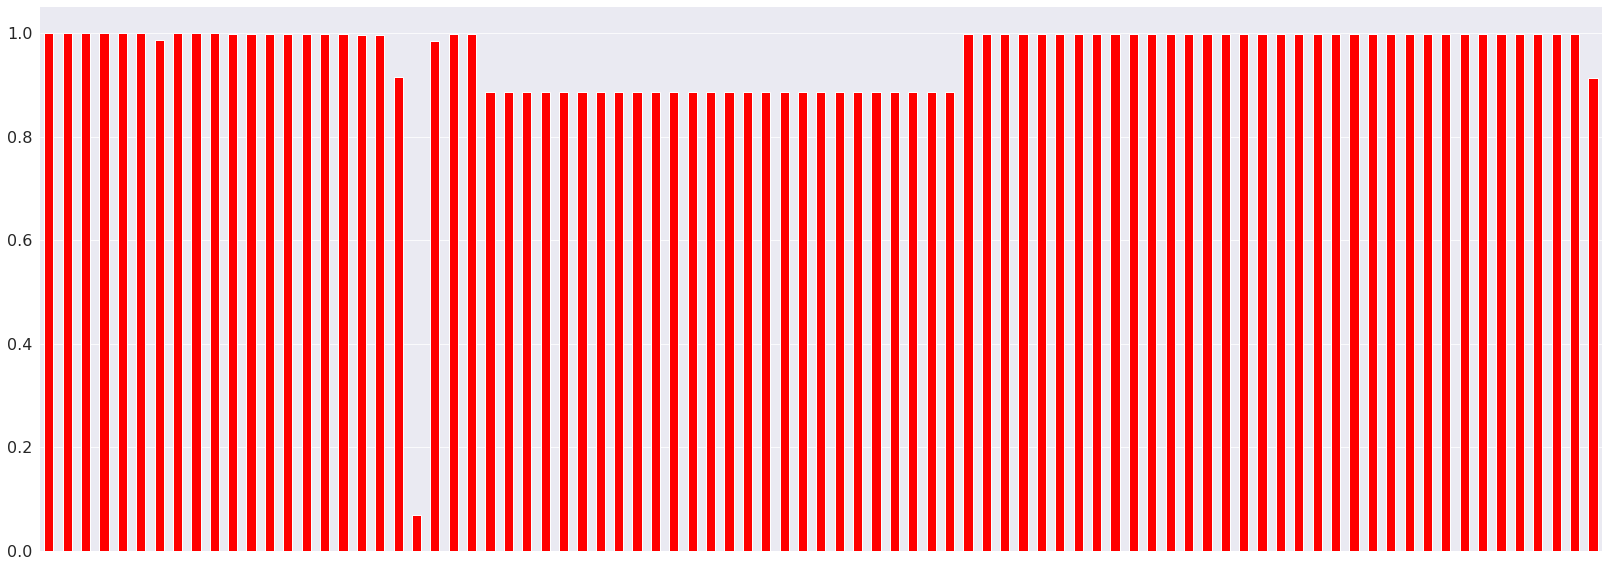

In [14]:
msno.bar(df.sample( 18207 ),(28,10),color='red')

In [16]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

##### o valor 48 se repete várias vezes, vamos verificar se possuem o mesmo ID

In [17]:
missing_height = df[df['Height'].isnull()].index.tolist()
print('missing_height = ',missing_height)

missing_weight = df[df['Weight'].isnull()].index.tolist()
print('missing_weight =',missing_height)
print('')

if missing_height == missing_weight:
    print('São iguais')
else:
    print('São diferentes')

missing_height =  [13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248, 13249, 13250, 13251, 13252, 13253, 13254, 13255, 13256, 13257, 13258, 13259, 13260, 13261, 13262, 13263, 13264, 13265, 13266, 13267, 13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275, 13276, 13277, 13278, 13279, 13280, 13281, 13282, 13283]
missing_weight = [13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248, 13249, 13250, 13251, 13252, 13253, 13254, 13255, 13256, 13257, 13258, 13259, 13260, 13261, 13262, 13263, 13264, 13265, 13266, 13267, 13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275, 13276, 13277, 13278, 13279, 13280, 13281, 13282, 13283]

São iguais


In [19]:
# Apagando registros através da lista de índices
df.drop(df.index[missing_height],inplace =True)

In [20]:
# Verificando novamente
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1513
Length: 85, dtype: int64

In [21]:
# Apagando colunas com valores nulos
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18111 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18111 non-null  int64  
 1   Name                      18111 non-null  object 
 2   Age                       18111 non-null  int64  
 3   Nationality               18111 non-null  object 
 4   Overall                   18111 non-null  int64  
 5   Potential                 18111 non-null  int64  
 6   Club                      17870 non-null  object 
 7   Value                     18111 non-null  object 
 8   Wage                      18111 non-null  object 
 9   Special                   18111 non-null  int64  
 10  Preferred Foot            18111 non-null  object 
 11  International Reputation  18111 non-null  float64
 12  Weak Foot                 18111 non-null  float64
 13  Skill Moves               18111 non-null  float64
 14  Work R

#### Analisando os dados

In [24]:
#Total de paises que tem jogadores e os 5 maiores
print('Numero total de países : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(10))

Numero total de países : 164
England        1652
Germany        1192
Spain          1069
Argentina       935
France          907
Brazil          825
Italy           697
Colombia        612
Japan           476
Netherlands     451
Name: Nationality, dtype: int64


In [25]:
# Verificando a quantidade de times e a quantidade de jogadores
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(10))

Total number of clubs : 651
TSG 1899 Hoffenheim        33
Chelsea                    33
CD Leganés                 33
Manchester City            33
Southampton                33
Fortuna Düsseldorf         33
Frosinone                  33
Wolverhampton Wanderers    33
Atlético Madrid            33
Burnley                    33
Name: Club, dtype: int64


In [26]:
# Melhor jogador no jogo
print('Maior potencial : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Melhor Performance : '+str(df.loc[df['Overall'].idxmax()][1]))

Maior potencial : K. Mbappé
Melhor Performance : L. Messi


In [27]:
# Modificando valores para ficarem mais fáceis de visualizar

def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [31]:
df['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18111, dtype: float64

In [32]:
# Quem ganha mais bufunfa
print('Jogador mais valioso : '+str(df.loc[df['Value'].idxmax()][1]))
print('Com o maior salário  : '+str(df.loc[df['Wage'].idxmax()][1]))

Jogador mais valioso : Neymar Jr
Com o maior salário  : L. Messi


#### Análise exploratória dos dados

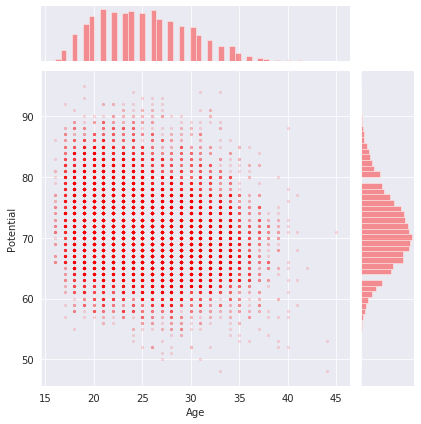

In [33]:
# Comparando idade a potencial
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

#### Viualizando como a velocidade cai com a idade

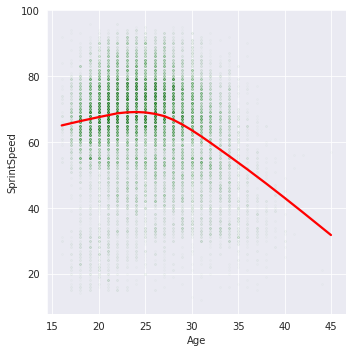

In [34]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

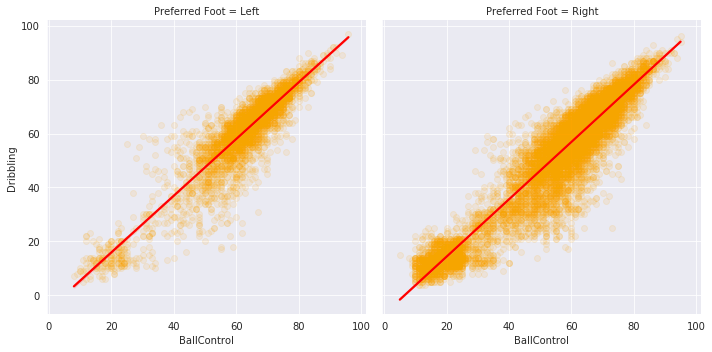

In [35]:
# Verificando controle de bola de jogadores Canhotos X Destros
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

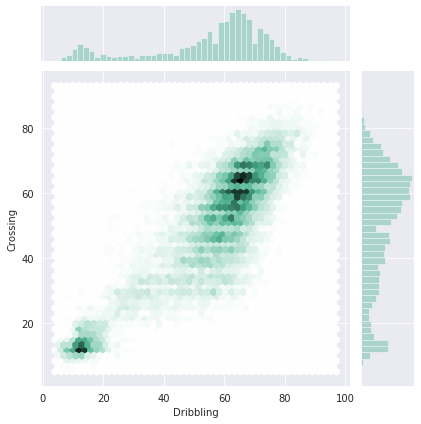

In [36]:
# Dribladores X Cruzadores
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391");

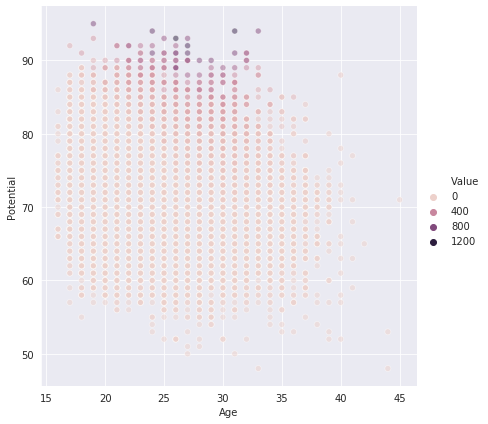

In [37]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

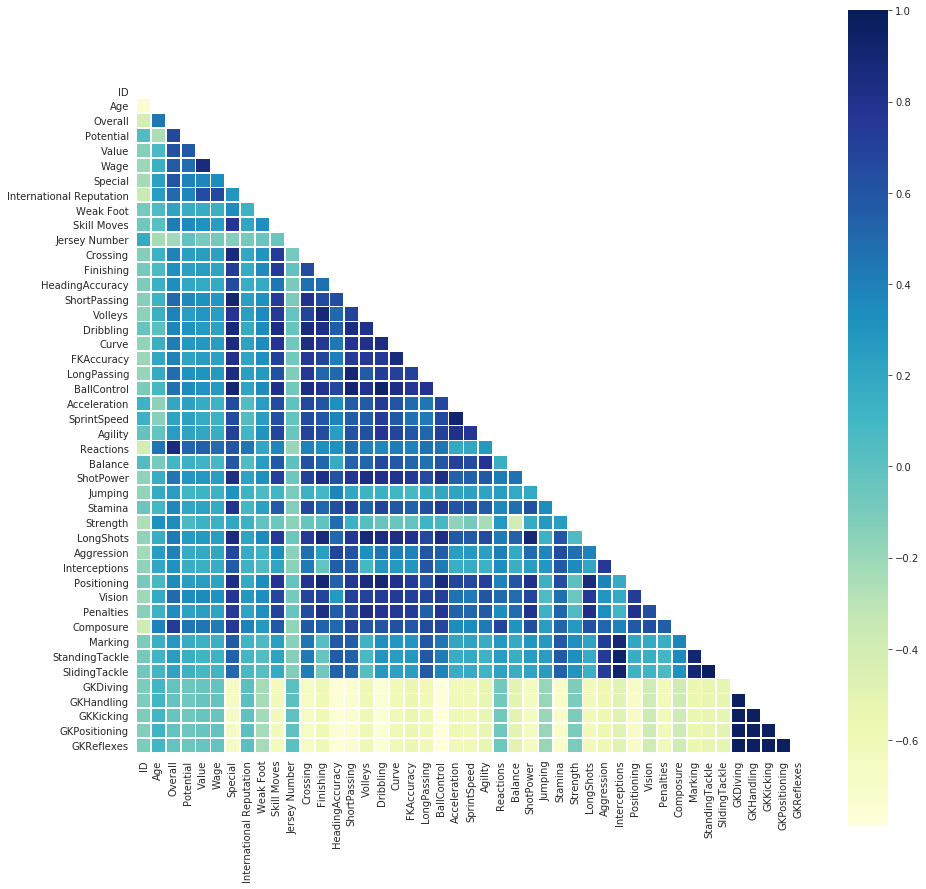

In [38]:
# Visualizando correlação entre as características
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

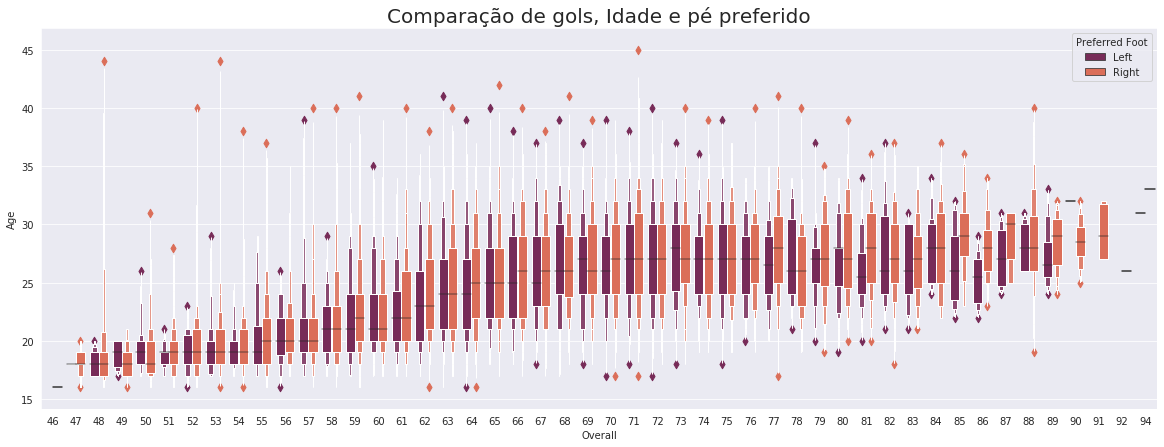

In [39]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparação de gols, Idade e pé preferido', fontsize = 20)
plt.show()

In [40]:
# Utilizando menos dados
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]

In [41]:
df_small.head(10)

,Age,Overall,Potential,Acceleration,SprintSpeed,Agility,Stamina,Strength,Preferred Foot
0,31,94,94,91.0,86.0,91.0,72.0,59.0,Left
1,33,94,94,89.0,91.0,87.0,88.0,79.0,Right
2,26,92,93,94.0,90.0,96.0,81.0,49.0,Right
3,27,91,93,57.0,58.0,60.0,43.0,64.0,Right
4,27,91,92,78.0,76.0,79.0,90.0,75.0,Right
5,27,91,91,94.0,88.0,95.0,83.0,66.0,Right
6,32,91,91,80.0,72.0,93.0,89.0,58.0,Right
7,31,91,91,86.0,75.0,82.0,90.0,83.0,Right
8,32,91,91,76.0,75.0,78.0,84.0,83.0,Right
9,25,90,93,43.0,60.0,67.0,41.0,78.0,Right


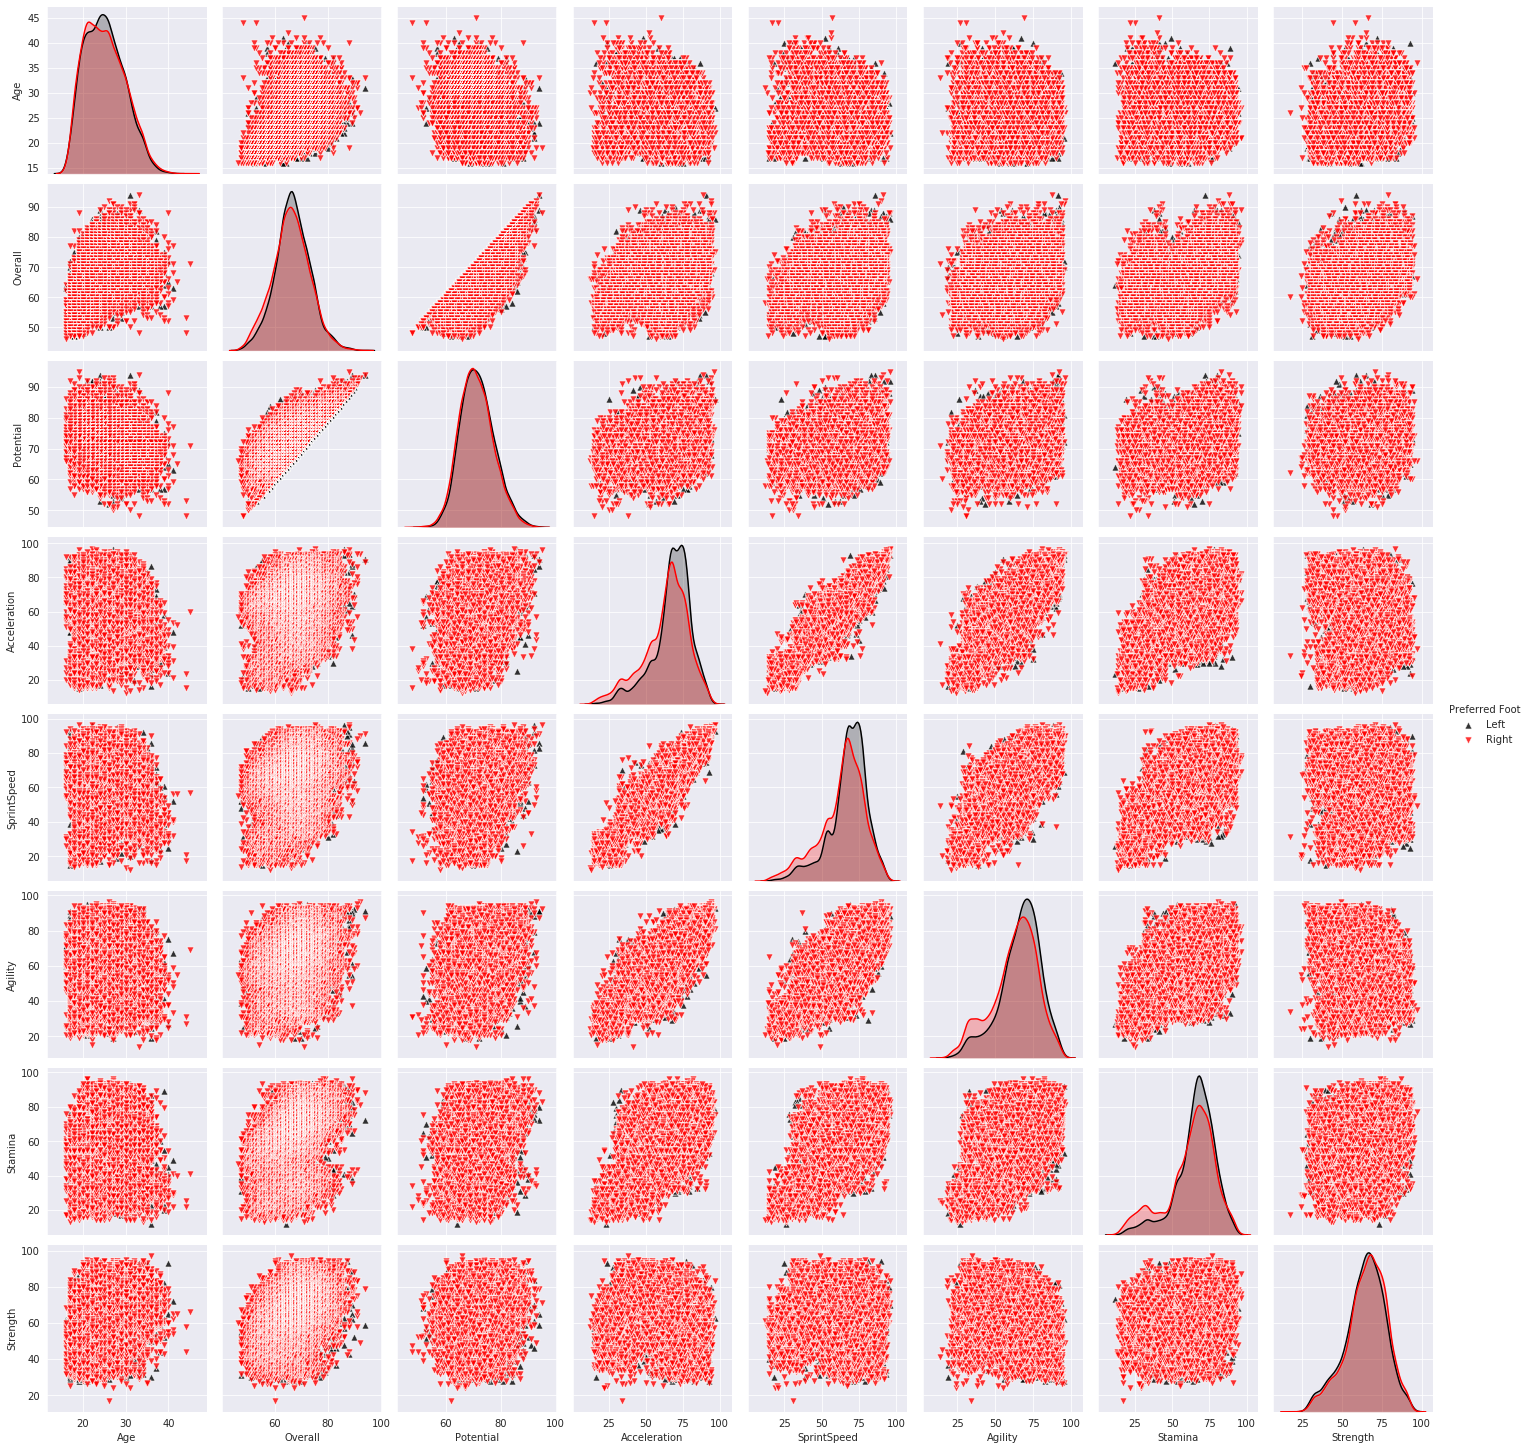

In [42]:
# Comparando todas as variáveis de uma só vez
sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "red"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

### Modelando

In [43]:
# Relendo os dados para fazer a modelagem
df = pd.read_csv('fifa19-data.csv')

# Removendo colunas desnecessárias
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [45]:
# Transformar a variável Turn Real Face em uma variável binária
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
# Transformar a variável Preferred Foot em uma variável binária
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

# Simplificando o nome das posições
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

# contar a quantidade de nacionalidades e criando grupos de maiores nacionalidades
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

# Transformar a variável Nationality para binária, marcando 1 para maiores nacionalidades
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

# Criando uma copia do dataframe para evitar erros de indice
df1 = df.copy()

# Aplicar as funções nas colunas do dataframe
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

# Divida a coluna "Work Rate" em duas
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 

# Criar nova coluna para primeira parte de "Work Rate"
df1["WorkRate1"]= tempwork[0]   

# Criar nova coluna para segunda parte de "Work Rate"
df1["WorkRate2"]= tempwork[1]

# APagando as colunas utilizadas
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [46]:
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

# Dividindo em teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

# Criando variáveis dummy
X_train = pd.get_dummies(X_train) # Converta variáveis categóricas em variáveis dummy / indicadoras.
X_test = pd.get_dummies(X_test)

print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [47]:
# Aplicando regressão linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # Treino
predictions = model.predict(X_test)

# Avaliando o modelo
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9294827031152093
RMSE : 1.824503022645273


### A importância da permutação é a primeira ferramenta para entender um modelo de aprendizado de máquina e envolve embaralhar variáveis individuais nos dados de validação (depois que um modelo foi ajustado) e ver o efeito na precisão.

In [48]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3832 ± 0.0093,Potential
0.2040 ± 0.0079,Age
0.0797 ± 0.0044,Reactions
0.0681 ± 0.0032,BallControl
0.0420 ± 0.0022,GKReflexes
0.0351 ± 0.0022,GKDiving
0.0259 ± 0.0021,HeadingAccuracy
0.0212 ± 0.0019,GKHandling
0.0193 ± 0.0011,ShortPassing
0.0138 ± 0.0013,Skill Moves


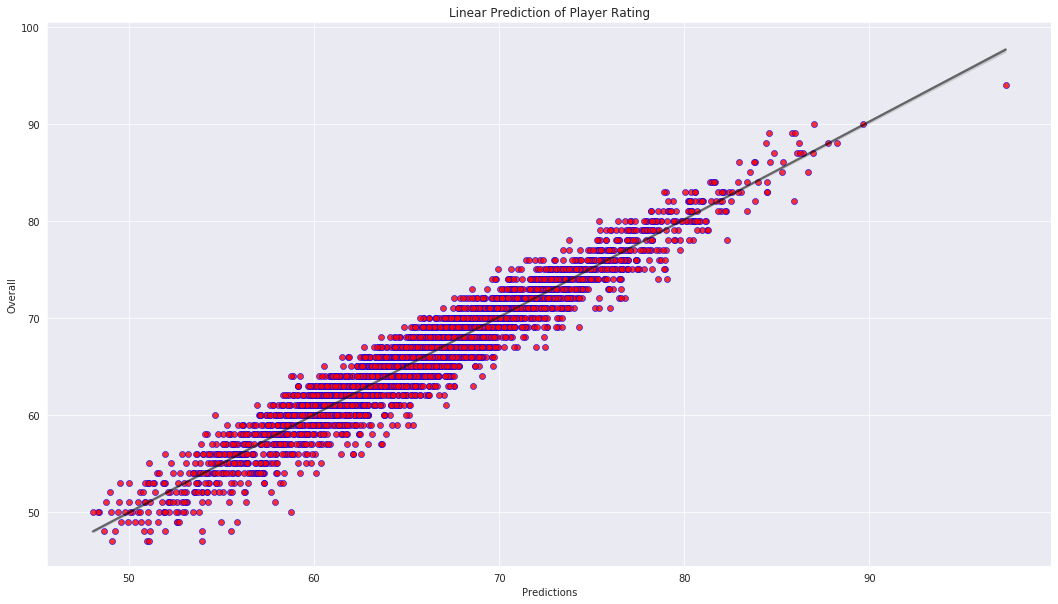

In [49]:
# Visualizando o resultado
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

Referência = https://www.kaggle.com/nitindatta/fifa-in-depth-analysis-with-linear-regression